<a href="https://colab.research.google.com/github/AkiBae4891/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/blob/master/Anime_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# imports for the project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## First, we use Pandas to read our data and make a dataframe called "Anime"

In [0]:
anime = pd.read_csv('anime.csv')


In [3]:
# Look inside the first 10 rows
anime.head(10)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
5,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,"Comedy, Drama, School, Shounen, Sports",TV,10,9.15,93351
6,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,148,9.13,425855
7,820,Ginga Eiyuu Densetsu,"Drama, Military, Sci-Fi, Space",OVA,110,9.11,80679
8,15335,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...,"Action, Comedy, Historical, Parody, Samurai, S...",Movie,1,9.10,72534
9,15417,Gintama&#039;: Enchousen,"Action, Comedy, Historical, Parody, Samurai, S...",TV,13,9.11,81109


## It's important to check if there are any NA or Unknown values in the data

In [4]:
# I saw 'episodes' has an input 'unknown' making the column an object.
print(anime.shape)
anime.dtypes

(12294, 7)


anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

In [5]:
anime.describe(exclude='object')

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [6]:
# in 'episodes' column there are 187 unique entries without numbers
anime.describe(exclude='number')

,name,genre,type,episodes
count,12294,12232,12269,12294
unique,12292,3264,6,187
top,Saru Kani Gassen,Hentai,TV,1
freq,2,823,3787,5677


## Using this method we can count how many missing values there are, and where they are.

In [8]:
# there are quite a lot of NA entries
anime.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [9]:
anime.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [10]:
anime.episodes.describe()

count     12294
unique      187
top           1
freq       5677
Name: episodes, dtype: object

## Let's call all the 'Unknowns' and see where they are 

In [11]:
# Look at the unknowns in episodes

anime[anime['episodes']=='Unknown'].head()

,anime_id,name,genre,type,episodes,rating,members
74,21,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,Unknown,8.58,504862
252,235,Detective Conan,"Adventure, Comedy, Mystery, Police, Shounen",TV,Unknown,8.25,114702
615,1735,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,Unknown,7.94,533578
991,966,Crayon Shin-chan,"Comedy, Ecchi, Kids, School, Shounen, Slice of...",TV,Unknown,7.73,26267
1021,33157,Tanaka-kun wa Itsumo Kedaruge Specials,"Comedy, School, Slice of Life",Special,Unknown,7.72,5400


## A lot of these 'Unknown' is because the anime is still running. They don't have an episode count because they are not finished yet.  TV unknown: most likely ongoing. Special: unknown, maybe a one-off. ONA: are released for the net and can have many episodes, OVA: are released for home video and are often 1-3 episodes. Hentai are usually 1 episode unless they are a series. For the sake of data these should all be 1 or the median.

In [0]:
# Change some of the unknowns

anime.loc[(anime['genre']=='Hentai') & (anime['episodes']=='Unknown'),'episodes'] = '1'
anime.loc[(anime['type']=='OVA') & (anime['episodes']=='Unknown'),'episodes'] = '1'
anime.loc[(anime['type'] == 'Movie') & (anime['episodes'] == 'Unknown'), 'episodes'] = '1'

In [0]:
# Some anime I know the episode count, so I can input them myself

familiar_animes = {'Berserk (2017)':24, 'Naruto Shippuuden':500, 'One Piece':892,'Detective Conan':864, 'Dragon Ball Super':86,
                'Crayon Shin chan':942, 'Yu Gi Oh Arc V':148,'Shingeki no Kyojin Season 2':12,
                'Boku no Hero Academia 2nd Season':25,'Little Witch Academia TV':25}

## Now we assign the episode counts to their respective anime 

In [0]:
# add the episodes I know into the list 

for n,e in familiar_animes.items():    
    anime.loc[anime['name']==n,'episodes'] = e

In [0]:
# For the rest of the unknowns we convert them to NA values 
anime['episodes'] = anime['episodes'].map(lambda x:np.nan if x=='Unknown' else x)

In [0]:
# These NA values are not much easier to change to the median
anime['episodes'].fillna(anime['episodes'].median(),inplace = True)

## Now that we have changed the unknown values, the call for unknowns returns empty! 

In [9]:
# episode 'unknowns' are gone now
anime[anime['episodes']=='Unknown'].head(10)

,anime_id,name,genre,type,episodes,rating,members


## To make the data easier to deal with, and graph, all numbers should be converted to floats.

In [0]:
# convert all numbers and integers to floating numbers, fill NA in ratings with median 
anime["rating"] = anime["rating"].astype(float)
anime["members"] = anime["members"].astype(float)
anime["episodes"] = anime["episodes"].astype(float)
anime["rating"].fillna(anime["rating"].median(),inplace = True)


## The data is large, and not easy to visualize like this. Now we take steps to reduce it's dimensionality.

In [11]:
# Put the data together while seperating some of the clustered columns like type. 

anime_sets = pd.concat([anime["genre"].str.get_dummies(sep=","),
                            pd.get_dummies(anime[["type"]]),
                            anime[["rating"]],anime[["members"]],anime["episodes"]],axis=1)

anime_sets.head()

,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,...,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shounen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,rating,members,episodes
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,9.37,200630.0,1.0
1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,9.26,793665.0,64.0
2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,9.25,114262.0,51.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,9.17,673572.0,24.0
4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,9.16,151266.0,51.0


In [12]:
# Look at the data after the changes 
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630.0
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665.0
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262.0
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572.0
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,151266.0


In [13]:
anime.describe()

,anime_id,episodes,rating,members
count,12294.000000,12294.000000,12294.000000,1.229400e+04
mean,14058.221653,12.244835,6.475700,1.807134e+04
std,11455.294701,47.550206,1.017179,5.482068e+04
min,1.000000,1.000000,1.670000,5.000000e+00
25%,3484.250000,1.000000,5.900000,2.250000e+02
50%,10260.500000,2.000000,6.570000,1.550000e+03
75%,24794.500000,12.000000,7.170000,9.437000e+03
max,34527.000000,1818.000000,10.000000,1.013917e+06


In [14]:
# Look at the columns in the set just made 
anime_sets.columns



Index([' Adventure', ' Cars', ' Comedy', ' Dementia', ' Demons', ' Drama',
       ' Ecchi', ' Fantasy', ' Game', ' Harem', ' Hentai', ' Historical',
       ' Horror', ' Josei', ' Kids', ' Magic', ' Martial Arts', ' Mecha',
       ' Military', ' Music', ' Mystery', ' Parody', ' Police',
       ' Psychological', ' Romance', ' Samurai', ' School', ' Sci-Fi',
       ' Seinen', ' Shoujo', ' Shoujo Ai', ' Shounen', ' Shounen Ai',
       ' Slice of Life', ' Space', ' Sports', ' Super Power', ' Supernatural',
       ' Thriller', ' Vampire', ' Yaoi', ' Yuri', 'Action', 'Adventure',
       'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy',
       'Game', 'Harem', 'Hentai', 'Historical', 'Horror', 'Josei', 'Kids',
       'Magic', 'Martial Arts', 'Mecha', 'Military', 'Music', 'Mystery',
       'Parody', 'Police', 'Psychological', 'Romance', 'Samurai', 'School',
       'Sci-Fi', 'Seinen', 'Shoujo', 'Shounen', 'Slice of Life', 'Space',
       'Sports', 'Super Power', 'Supernatural'

## Now we use sklearn's preprocessing to minimize and scale the data 

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
min_max_scaler = MinMaxScaler()
anime_sets = min_max_scaler.fit_transform(anime_sets)

In [17]:
# numpy.round rounds the array we're making to the decimal we choose, 2
np.round(anime_sets,2)

array([[0.  , 0.  , 0.  , ..., 0.92, 0.2 , 0.  ],
       [1.  , 0.  , 0.  , ..., 0.91, 0.78, 0.03],
       [0.  , 0.  , 1.  , ..., 0.91, 0.11, 0.03],
       ...,
       [0.  , 0.  , 0.  , ..., 0.39, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.4 , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.45, 0.  , 0.  ]])

## Now we will use K-Nearest Neighbor to fit the data, (class sklearn.neighbors.BallTree, BallTree for fast generalized N-point problems) 

In [0]:
# fit to nearest neighbor 

from sklearn.neighbors import NearestNeighbors

In [0]:
neighbor = NearestNeighbors(n_neighbors=6, algorithm='ball_tree').fit(anime_sets)

In [0]:
distances, indices = neighbor.kneighbors(anime_sets)

## Now we can start writing some of the exciting functions of this data: Get ID, Get Index, Similar Animes

In [0]:
# get index from name 

def get_index_from_name(name):
    return anime[anime['name']==name].index.tolist()[0]

In [0]:
# Put all the names into one variable

all_anime_names = list(anime.name.values)

In [0]:
# get ID from name partials

def get_id_from_partial_name(partial):
    for name in all_anime_names:
        if partial in name:
            print(name,all_anime_names.index(name))

In [0]:
# print similar animes using ID and Name 

def print_similar_animes(query=None,id=None):
    if id:
        for id in indices[id][1:]:
            print(anime.loc[id]['name'])
    if query:
        found_id = get_index_from_name(query)
        for id in indices[found_id][1:]:
            print(anime.loc[id]['name'])

## Let's test our recommendation and finding functions 

In [25]:
# test it
# Get anime similar to the one you like or watched 

print_similar_animes(query="Hellsing");

Ajin
Dance in the Vampire Bund
Trinity Blood
Blood-C
Ajin 2nd Season


In [35]:
print_similar_animes("Bleach")

Katekyo Hitman Reborn!
Code:Breaker
Tokyo ESP
Yozakura Quartet: Hana no Uta
Yozakura Quartet


In [36]:
print_similar_animes("Claymore")

Ao no Exorcist
Ao no Exorcist: Kyoto Fujouou-hen
Nanatsu no Taizai
Noragami Aragoto
Kuroshitsuji II


In [37]:
# from partial name find the ID's from the list 

get_id_from_partial_name("Naruto")

Boruto: Naruto the Movie 486
Naruto: Shippuuden 615
The Last: Naruto the Movie 719
Naruto: Shippuuden Movie 6 - Road to Ninja 784
Naruto 841
Boruto: Naruto the Movie - Naruto ga Hokage ni Natta Hi 1103
Naruto: Shippuuden Movie 5 - Blood Prison 1237
Naruto x UT 1343
Naruto: Shippuuden Movie 4 - The Lost Tower 1472
Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsugu Mono 1573
Naruto: Shippuuden Movie 1 1827
Naruto: Shippuuden Movie 2 - Kizuna 1828
Naruto Shippuuden: Shippuu! &quot;Konoha Gakuen&quot; Den 2374
Naruto: Honoo no Chuunin Shiken! Naruto vs. Konohamaru!! 2416
Naruto SD: Rock Lee no Seishun Full-Power Ninden 2457
Naruto Shippuuden: Sunny Side Battle 2458
Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shinobu Houjou Dattebayo! 2756
Naruto Soyokazeden Movie: Naruto to Mashin to Mitsu no Onegai Dattebayo!! 2997
Naruto Movie 2: Dai Gekitotsu! Maboroshi no Chiteiiseki Dattebayo! 3449
Naruto: Dai Katsugeki!! Yuki Hime Shinobu Houjou Dattebayo! Special: Konoha Annual Sports Festival 3529
Naru

In [38]:
get_id_from_partial_name("Trigun")

Trigun 214
Trigun: Badlands Rumble 441


In [39]:
get_id_from_partial_name("Trinity")

Trinity Seven OVA 1480
Trinity Blood 1805
Trinity Seven 1845
Persona: Trinity Soul 4293
Trinity Seven Movie: Eternity Library to Alchemic Girl 11094


In [40]:
get_id_from_partial_name("Bleach")

Bleach 582
Bleach Movie 4: Jigoku-hen 946
Bleach Movie 3: Fade to Black - Kimi no Na wo Yobu 1131
Bleach Movie 2: The DiamondDust Rebellion - Mou Hitotsu no Hyourinmaru 1274
Bleach Movie 1: Memories of Nobody 1333
Bleach: Memories in the Rain 2598
Bleach: The Sealed Sword Frenzy 3196


In [41]:
# search by ID; FMA

print_similar_animes(id=5114)

Shen Ming Zhi Zhou
Yong Zhe Da Mao Xian 2nd Season
Mo Jing Lieren 2nd Season
Pankunchi
Mo Jing Lieren 3rd Season


In [42]:
# what is 269? 
bleach = (anime.anime_id[582])
bleach

269

## Now we will graph some information from the data set

In [43]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630.0
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665.0
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262.0
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572.0
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,151266.0


In [0]:
# Look at types and rating
import matplotlib.pyplot as pls 
import pandas as pd
import seaborn as sns


## With a simple histogram we can see that the majority of the ratings are between 6 and 7-7.5

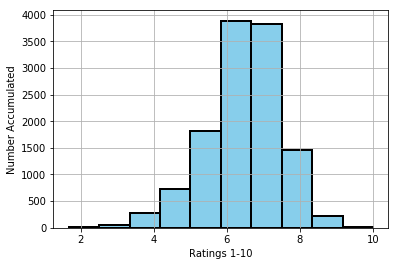

In [27]:
# Histogram of the ratings 
plt.xlabel('Ratings 1-10')
plt.ylabel('Number Accumulated')
anime.rating.hist(color = "skyblue", ec="black", lw=2);

## With this bar chart you can see how your favorite anime stacks up against others

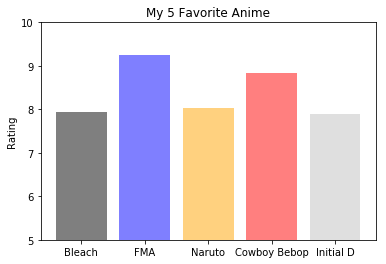

In [28]:
# 5 of my favorite animes and their overall rating 
objects = ('Bleach', 'FMA', 'Naruto', 
           "Cowboy Bebop", 'Initial D')
y_pos = np.arange(len(objects))
performance = [7.95,9.26,8.03,8.83,7.9,]

plt.bar(y_pos, performance, align='center', alpha=0.5, color=['black', 'blue', 'orange', 'red', 'silver'])
plt.xticks(y_pos, objects)
plt.ylabel('Rating')
plt.ylim(5,10)
plt.title('My 5 Favorite Anime')

plt.show()

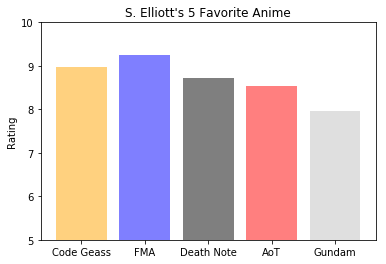

In [29]:
# 5 of my friend S. Elliot's favorite animes and their overall rating 
objects = ('Code Geass', 'FMA', 'Death Note', 
           "AoT", 'Gundam')
y_pos = np.arange(len(objects))
performance = [8.98,9.26,8.71,8.54,7.96,]

plt.bar(y_pos, performance, align='center', alpha=0.5, color=['orange', 'blue', 'black', 'red', 'silver'])
plt.xticks(y_pos, objects)
plt.ylabel('Rating')
plt.ylim(5,10)
plt.title("S. Elliott's 5 Favorite Anime")

plt.show()

## This Stem Plot shows us the ratings from members up to 1,000,000 unique entries

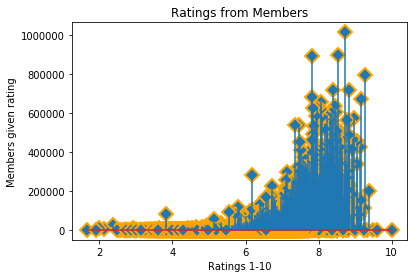

In [54]:
# Ratings from members up to 1 million 
import matplotlib.pyplot as plt
import numpy as np
plt.xlabel('Ratings 1-10')
plt.ylabel('Members given rating')
plt.title('Ratings from Members')
(markers, stemlines, baseline) = plt.stem(anime.rating, anime.members)
plt.setp(markers, marker='D', markersize=10, markeredgecolor="orange", markeredgewidth=2)
plt.show()

# plt.stem(anime.rating, anime.members); 

In [55]:
anime.rating.count()

12294